<a href="https://colab.research.google.com/github/jingmingliu01/DeepLearning-DSCI-6011-01-25Fall/blob/main/Assignment2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Instructions:  
1. Libraries allowed: **Python basic libraries, numpy, pandas, scikit-learn (only for data processing), and pytorch.**
2. Show all outputs.
3. Submit jupyter notebook and a pdf export of the notebook.
4. For practice examples, change variable name, shape, mathematical operations, nummerical values, tensor sizes etc. Be creative!



### Data Collection and Pre-processing
#### Q1

#### a) Tensors
Complete the tutorial at https://docs.pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html . make changes to the tensor, variable name etc. to make your example completely different from tutorial. Failing to do so will earn you zero credit.

Add as many cells below as needed.

In [2]:
import torch
import numpy as np

**1.1 Directly from data**

In [3]:
data = [[1,3.14],
        [4,5],
        [6,7]]

In [4]:
data

[[1, 3.14], [4, 5], [6, 7]]

In [5]:
tensor_data = torch.tensor(data)

In [6]:
tensor_data

tensor([[1.0000, 3.1400],
        [4.0000, 5.0000],
        [6.0000, 7.0000]])

In [7]:
tensor_data.shape

torch.Size([3, 2])

**1.2 From a NumPy array**

In [8]:
np_data = np.array(data)

In [9]:
np_data

array([[1.  , 3.14],
       [4.  , 5.  ],
       [6.  , 7.  ]])

In [10]:
tensor_np_data=torch.from_numpy(np_data)

In [11]:
tensor_np_data

tensor([[1.0000, 3.1400],
        [4.0000, 5.0000],
        [6.0000, 7.0000]], dtype=torch.float64)

In [12]:
tensor_np_data.shape

torch.Size([3, 2])

**1.3 From another tensor**

In [13]:
x_ones = torch.ones_like(tensor_data)

In [14]:
print(f"Ones Tensor: \n {x_ones} \n")

Ones Tensor: 
 tensor([[1., 1.],
        [1., 1.],
        [1., 1.]]) 



In [15]:
x_rand = torch.rand_like(tensor_data, dtype=torch.float)

In [16]:
print(f"Random Tensor: \n {x_rand} \n")

Random Tensor: 
 tensor([[0.9907, 0.5291],
        [0.1090, 0.1152],
        [0.4904, 0.4053]]) 



**1.4 With random or constant values**

In [17]:
shape=(4,2) # this is a tuple

In [18]:
rand = torch.rand(shape)
ones = torch.ones(shape)
zeros = torch.zeros(shape)

In [19]:
print(f"Random Tensor: \n {rand} \n")
print(f"Ones Tensor: \n {ones} \n")
print(f"Zeros Tensor: \n {zeros}")

Random Tensor: 
 tensor([[0.0693, 0.2692],
        [0.6609, 0.7814],
        [0.5943, 0.3277],
        [0.2587, 0.7313]]) 

Ones Tensor: 
 tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


**1.5 Attributes of a Tensor**

In [20]:
tensor = torch.rand(2,5)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([2, 5])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


**2 Operations on Tensors**

In [21]:
# We move our tensor to the current accelerator if available
if torch.accelerator.is_available():
    tensor = tensor.to(torch.accelerator.current_accelerator())

**2.1 Standard numpy-like indexing and slicing:**

In [22]:
tensor = torch.ones(3, 3)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,2] = 0
print(tensor)

First row: tensor([1., 1., 1.])
First column: tensor([1., 1., 1.])
Last column: tensor([1., 1., 1.])
tensor([[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.]])


**Joining tensors**

In [23]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 1., 0., 1., 1., 0., 1., 1., 0.],
        [1., 1., 0., 1., 1., 0., 1., 1., 0.],
        [1., 1., 0., 1., 1., 0., 1., 1., 0.]])


In [24]:
t2 = torch.cat([tensor, tensor, tensor], dim=0)
print(t2)

tensor([[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.]])


**Arithmetic operations**

In [25]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [26]:
y1

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [27]:
y2

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [28]:
y3

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [29]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 1., 0.],
        [1., 1., 0.],
        [1., 1., 0.]])

**Single-element tensors**

In [30]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

6.0 <class 'float'>


**In-place operations**

In [31]:
tensor = torch.ones(3,3)
print(f"{tensor} \n")
tensor.add_(3)
print(tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

tensor([[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]])


**3 Bridge with NumPy**

**3.1 Tensor to NumPy array**

In [32]:
t = torch.ones(3)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1.])
n: [1. 1. 1.]


In [44]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2.])
n: [2. 2. 2.]


In [45]:
n = np.ones(5)
t = torch.from_numpy(n)

In [46]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


#### b) Autormatic differentiation
Complete the tutorial at https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html . Again, make changes to the tensor, variable name etc. to make your example completely different from tutorial. Failing to do so will earn you zero credit.

Add as many cells below as needed.

In [49]:
import torch

x = torch.ones(6)  # input tensor
y = torch.zeros(2)  # expected output
w = torch.randn(6, 2, requires_grad=True)
b = torch.randn(2, requires_grad=True)
z = x @ w +b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [50]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7a7dcdcbbd30>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7a7dcdcba410>


In [51]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3964, 0.2577],
        [0.3964, 0.2577],
        [0.3964, 0.2577],
        [0.3964, 0.2577],
        [0.3964, 0.2577],
        [0.3964, 0.2577]])
tensor([0.3964, 0.2577])


**Disabling Gradient Tracking**

In [52]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [53]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


**Jacobian Product**

In [54]:
inp = torch.eye(4, 5, requires_grad=True)

In [55]:
inp

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]], requires_grad=True)

In [56]:
out = (inp+1).pow(2).t()

In [57]:
out

tensor([[4., 1., 1., 1.],
        [1., 4., 1., 1.],
        [1., 1., 4., 1.],
        [1., 1., 1., 4.],
        [1., 1., 1., 1.]], grad_fn=<TBackward0>)

In [58]:
out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


In [59]:
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")


Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])


In [61]:
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")


Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


#### c) Datasets and Dataloader

Download the "Hand Keypoint detection" dataset from https://www.kaggle.com/datasets/pablocumbrera/hand-keypoint-detection .
1. Define a pytorch Dataset class, HandKpDetection.
   1. Implement ``__init__`` method, in which gather the filepaths to all images in the dataset and store them in a list. Don't load the entire dataset or images in this method. Both image and label file share the same prefix, so just storing filepath for images will work.
   2. implement ``__len__`` method.
   3. Implement ``__getitem__(self, index)`` where you will load just one sample corresponding to the ``index`` in the method argument. Use the filepath information in the init methods to load both image and keypoints. Reshape the image to $32\times 32$ and keypoints to $20\times 2$
2. Implement Dataloaders with a minibatch size of 2. Convert both image and keypoints to ``torch.tensor``.
3. Visualize the images and print the keypoints in the first minibatch

Add as many cells below as needed.

**Download the dataset**

In [62]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pablocumbrera/hand-keypoint-detection")

print("Path to dataset files:", path)

100%|██████████| 632M/632M [00:05<00:00, 129MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pablocumbrera/hand-keypoint-detection/versions/1


**Define a pytorch Dataset class, HandKpDetection**

In [63]:
import os, glob, json
import torch
from torch.utils.data import Dataset
from PIL import Image
import numpy as np

In [73]:
class HandKpDetection(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (str): Dataset root, e.g.
                '/root/.cache/kagglehub/datasets/pablocumbrera/hand-keypoint-detection/versions/1/hand_labels_synth'
            transform: optional torchvision transform for images
        """
        self.root_dir = root_dir
        self.transform = transform

        # collect all .jpg files under synth1..synth4
        self.image_paths = []
        for folder in ["synth1", "synth2", "synth3", "synth4"]:
            self.image_paths.extend(sorted(glob.glob(os.path.join(root_dir, folder, "*.jpg"))))

        print("Found", len(self.image_paths), "images")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
      # --- load image ---
      img_path = self.image_paths[index]
      image = Image.open(img_path).convert("RGB")
      orig_w, orig_h = image.size   # original size

      # resize
      image = image.resize((32, 32))
      new_w, new_h = 32, 32

      # convert to tensor
      image = np.array(image, dtype=np.float32) / 255.0
      image = np.transpose(image, (2, 0, 1))
      image = torch.tensor(image)

      # --- load keypoints ---
      json_path = img_path.replace(".jpg", ".json")
      with open(json_path, "r") as f:
          ann = json.load(f)
      keypoints = np.array(ann["hand_pts"], dtype=np.float32)[:, :2]
      keypoints = keypoints.reshape(-1, 2)[:20]

      # scale keypoints to new size
      scale_x = new_w / orig_w
      scale_y = new_h / orig_h
      keypoints[:, 0] *= scale_x
      keypoints[:, 1] *= scale_y

      keypoints = torch.tensor(keypoints)

      return image, keypoints


**Implement Dataloaders with a minibatch size of 2. Convert both image and keypoints to torch.tensor.**

In [74]:
from torch.utils.data import DataLoader

root = "/root/.cache/kagglehub/datasets/pablocumbrera/hand-keypoint-detection/versions/1/hand_labels_synth"
dataset = HandKpDetection(root)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

images, keypoints = next(iter(dataloader))
print("Batch images:", images.shape)      # [2, 3, 32, 32]  [batch_size, channels, shape_x, shape_y]
print("Batch keypoints:", keypoints.shape) # [2, 20, 2]     [batch_size, shape_x, shape_y]

Found 14261 images
Batch images: torch.Size([2, 3, 32, 32])
Batch keypoints: torch.Size([2, 20, 2])


**Visualize the images and print the keypoints in the first minibatch**

First minibatch keypoints (tensor):
tensor([[[18.8417, 16.0015],
         [18.0125, 16.5376],
         [17.1612, 16.7042],
         [16.1864, 16.8205],
         [ 0.0000,  0.0000],
         [16.2965, 16.1416],
         [15.4284, 16.1616],
         [14.6583, 16.3780],
         [ 0.0000,  0.0000],
         [16.2193, 15.8830],
         [15.2294, 15.7947],
         [14.5839, 15.9803],
         [ 0.0000,  0.0000],
         [16.3774, 15.7657],
         [15.5360, 15.6582],
         [14.9376, 15.8091],
         [ 0.0000,  0.0000],
         [16.6569, 15.7312],
         [15.7037, 15.6752],
         [15.3216, 15.7910]],

        [[19.1302, 17.6419],
         [18.5524, 16.1821],
         [17.2766, 14.8454],
         [15.9123, 14.1921],
         [ 0.0000,  0.0000],
         [16.9338, 15.5863],
         [15.4189, 14.9634],
         [15.0314, 14.8810],
         [ 0.0000,  0.0000],
         [16.5269, 16.3090],
         [15.0948, 15.5956],
         [14.8860, 15.5257],
         [ 0.0000,  0.0000],
     

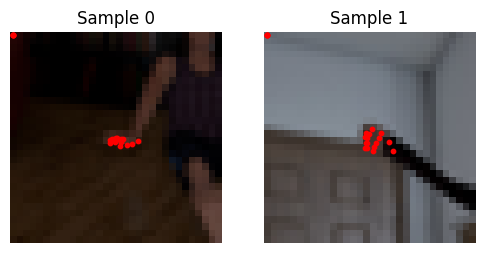

In [75]:
import matplotlib.pyplot as plt

# get the first minibatch
images, keypoints = next(iter(dataloader))

print("First minibatch keypoints (tensor):")
print(keypoints)

# visualize both images in the minibatch
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

for i in range(2):  # because batch_size = 2
    img = images[i].permute(1, 2, 0).numpy()   # CHW -> HWC
    kp = keypoints[i].numpy()

    axes[i].imshow(img)
    axes[i].scatter(kp[:, 0], kp[:, 1], c='red', s=10)  # plot keypoints
    axes[i].set_title(f"Sample {i}")
    axes[i].axis("off")

plt.show()

#### d) Build model
Complete the tutorial at https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html.

Add as many cells below as needed.

#### e) Optimization loop
Complete the tutorial at https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html.

Add as many cells below as needed.

#### f) Save, load, and use model
Complete the tutorial at https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html.

Add as many cells below as needed.

### Exercise
### Q2
a) Create a pytorch class for a neural network with 3 inputs, one hidden layer with 5 neurons and ReLU activatioin function, one output layer with 2 outputs. Use $torch.nn.init$ to initialize the biases to zeros and initialize the weights from a random distribution with vairiance $0.1$ and mean $0.0$.




In [33]:
# code



b) Instantiate the class to create a model. Access the weights and biases and print them.


In [34]:
# code

c) Create a tensor X with 2 samples and 3 features randomly from a uniform distribution. Suppose the labels are 0 and 1, respectively for these two samples.

In [35]:
# code

d) Instantiate crossentropy loss.

In [36]:
# code

e) Define an optimizer with stochastic gradient descent. Set the learning rate to 0.1.

In [37]:
# code

f) Set the gradients of the model to zero. Do backpropagation and find the jacobians of loss with respect to weights and biases in the first and second layers.

In [38]:
# code

g) Update the parameters.

In [39]:
# code

h) Print the weight and biases in the first layer after update.

In [40]:
# code

i) save the model

In [41]:
# code

j) instantiate the network in Q2(a) agian to create ``model2``

k) Print the weight and biases in the first layer

In [42]:
# code

l) Now, load the saved model and print the first layer weight and biases again.

In [43]:
# code